In [ ]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

TF Version: 2.6.0
TF hub Version: 0.12.0
GPU availabe


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15354757846969579880, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4845698960401510338
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [5]:

!gdown --id 1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn- 
!gdown --id 1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8

Downloading...
From: https://drive.google.com/uc?id=1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn-
To: /content/Fresh.zip
100% 172M/172M [00:01<00:00, 154MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8
To: /content/Withered.zip
100% 230M/230M [00:01<00:00, 174MB/s]


In [6]:
import zipfile
local_zip = '/content/Fresh.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
#zip_ref.extractall('/content')
zip_ref.close()

local_zip = '/content/Withered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
#zip_ref.extractall('/FileStore/tables/tealeaf/content')
zip_ref.close()

In [7]:
import os 
import numpy as np
np.random.seed(777)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as k


from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [8]:
train_dir = '/content/Withered/'
test_dir = '/content/Withered/'

for root,dirs,files in os.walk(train_dir):
    print (root, len(files))
print("-"*70)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/Withered/ 0
/content/Withered/Best 269
/content/Withered/Below Best 279
/content/Withered/Poor 273
----------------------------------------------------------------------
/content/Withered/ 0
/content/Withered/Best 269
/content/Withered/Below Best 279
/content/Withered/Poor 273


In [9]:
output_classes = 3
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 20
nb_train_samples = 821
nb_test_samples = 821

In [10]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')


Found 821 images belonging to 3 classes.
Found 821 images belonging to 3 classes.


In [11]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
model = Sequential()

model.add(VGG19(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))

model.layers[0].trainable = True

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


80150528/80134624 [==============================] - 1s 0us/step


In [12]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = (nb_train_samples)//batch_size,
  #steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = (nb_test_samples)//batch_size) # if you have test data

  #validation_steps = nb_test_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
25/25 [==============================] - 113s 3s/step - loss: 1.3815 - accuracy: 0.3561 - val_loss: 1.0384 - val_accuracy: 0.4913
Epoch 2/20
25/25 [==============================] - 56s 2s/step - loss: 1.1999 - accuracy: 0.4221 - val_loss: 0.8877 - val_accuracy: 0.6087
Epoch 3/20
25/25 [==============================] - 56s 2s/step - loss: 0.9754 - accuracy: 0.5336 - val_loss: 0.8199 - val_accuracy: 0.6313
Epoch 4/20
25/25 [==============================] - 57s 2s/step - loss: 0.8312 - accuracy: 0.6299 - val_loss: 0.6840 - val_accuracy: 0.7200
Epoch 5/20
25/25 [==============================] - 56s 2s/step - loss: 0.7656 - accuracy: 0.6451 - val_loss: 0.5760 - val_accuracy: 0.7638
Epoch 6/20
25/25 [==============================] - 56s 2s/step - loss: 0.6439 - accuracy: 0.7224 - val_loss: 0.5046 - val_accuracy: 0.7837
Epoch 7/20
25/25 [==============================] - 57s 2s/step - loss: 0.5860 - accuracy: 0.7478 - val_loss: 0.4916 - val_accuracy: 0.8037
Epoch 8/20
25/25 [=

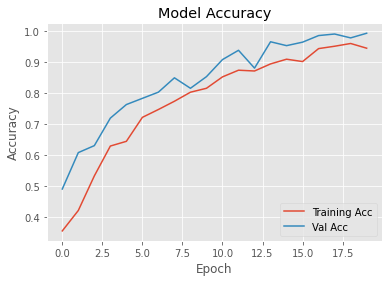

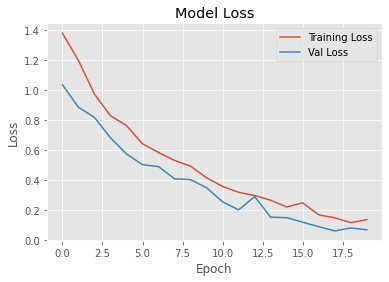

In [14]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper right')
plt.show()

In [15]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


25/25 [==============================] - 23s 885ms/step
No of errors = 5/821


Confusion Matrix
[[276   0   3]
 [  2 267   0]
 [  0   0 273]]


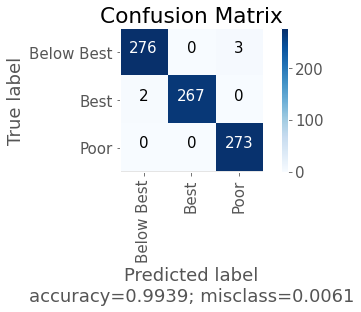

<Figure size 2160x2160 with 0 Axes>

In [16]:
from sklearn import preprocessing
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(30,30))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Below Best       0.99      0.99      0.99       279
        Best       1.00      0.99      1.00       269
        Poor       0.99      1.00      0.99       273

    accuracy                           0.99       821
   macro avg       0.99      0.99      0.99       821
weighted avg       0.99      0.99      0.99       821



In [18]:
model.save('/content/Models/Withered-model.h5')
model.save_weights('/content/Models/Withered-Weights.h5')

In [19]:
import pickle
pickle.dump(model, open('Withered_model.pkl', 'wb'))

TypeError: ignored

In [20]:
import joblib
joblib.dump('Withered_model.pkl')


TypeError: ignored

In [ ]:
import joblib
filename = 'Withered_model.sav'
joblib.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

TypeError: ignored

In [21]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('withered_model.json', 'w') as json_file:
    json_file.write(json_model)